In [1]:
'''Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.'''

'Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.\nPerform following tasks:\n1. Pre-process the dataset.\n2. Identify outliers.\n3. Check the correlation.\n4. Implement linear regression and random forest regression models.\n5. Evaluate the models and compare their respective scores like R2, RMSE, etc.'

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("uber.csv")

In [4]:
df.shape

(200000, 9)

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.sample(4)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
29262,35293880,2009-06-29 07:12:20.0000002,18.9,2009-06-29 07:12:20 UTC,-73.980564,40.780023,-74.012562,40.702530,1
148946,11216234,2011-09-06 18:15:00.00000045,14.9,2011-09-06 18:15:00 UTC,-73.966367,40.758667,-73.985917,40.719817,1
180958,16479626,2011-03-31 22:51:27.0000003,9.7,2011-03-31 22:51:27 UTC,-73.989784,40.762188,-73.994508,40.738900,3
162579,24627167,2014-03-06 22:56:00.000000266,4.5,2014-03-06 22:56:00 UTC,-73.973677,40.751960,-73.969637,40.759447,2


## 1. Preporcess data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
## drop unnecessary columns
df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)

In [10]:
df.sample(2)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
230,7.3,-73.993193,40.749672,-74.007682,40.731123,5
84401,8.5,-74.002438,40.739810,-73.975310,40.755543,4


In [11]:
df.isnull().sum() #1 null value is present there 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum() #now no null value is there 

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## 2.Identify Outliers

<Axes: >

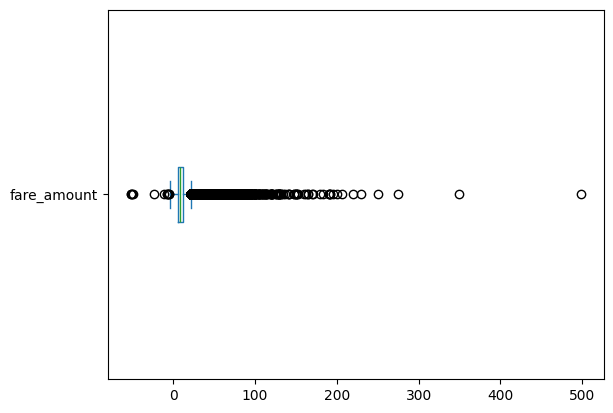

In [14]:
df['fare_amount'].plot.box(vert=False)

<Axes: >

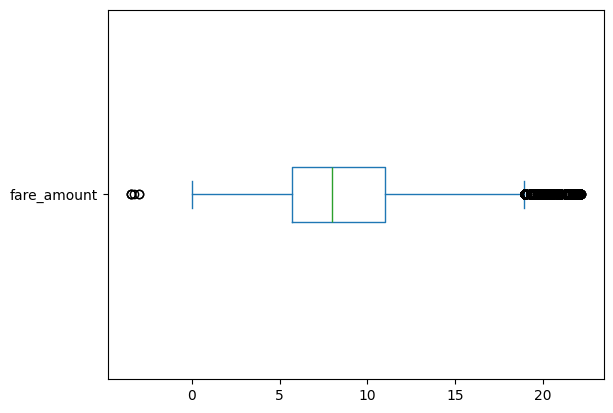

In [15]:
# calculate inter quartile range
q1=df['fare_amount'].quantile(0.25)
q3=df['fare_amount'].quantile(0.75)

IQR=q3-q1

lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR

#reomve outliers
df=df[(df['fare_amount']>=lower_bound) & (df['fare_amount']<=upper_bound)]
df['fare_amount'].plot.box(vert=False)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

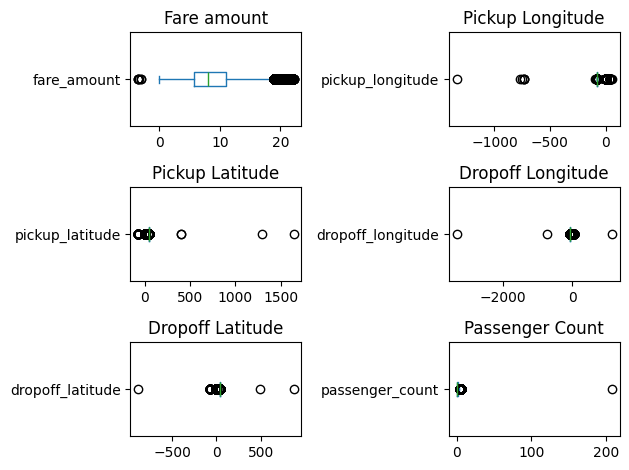

In [17]:
plt.subplot(3,2,1)
plt.title("Fare amount")
df['fare_amount'].plot.box(vert=False)

plt.subplot(3,2,2)
plt.title("Pickup Longitude")
df['pickup_longitude'].plot.box(vert=False)

plt.subplot(3,2,3)
plt.title("Pickup Latitude")
df['pickup_latitude'].plot.box(vert=False)

plt.subplot(3,2,4)
plt.title("Dropoff Longitude")
df['dropoff_longitude'].plot.box(vert=False)

plt.subplot(3,2,5)
plt.title("Dropoff Latitude")
df['dropoff_latitude'].plot.box(vert=False)

plt.subplot(3,2,6)
plt.title("Passenger Count")
df['passenger_count'].plot.box(vert=False)

plt.tight_layout()

## 3. Check the correlation

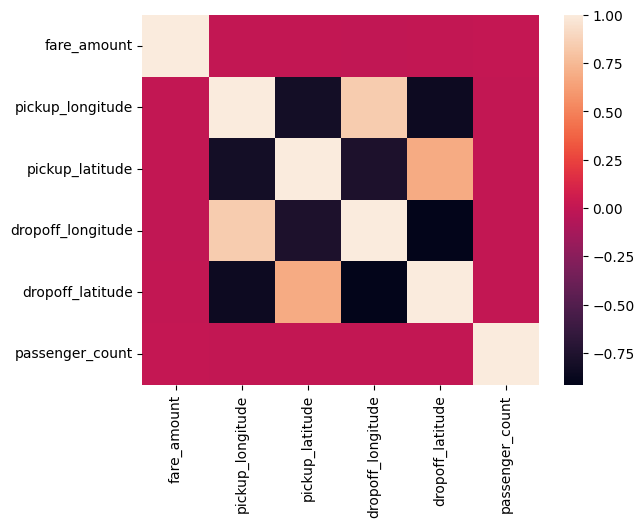

In [18]:
import seaborn as sns
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix)
plt.show()

## 4. Implement Linear Regression and Random Forest

In [19]:
#Split the data
X=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
Y=df['fare_amount']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# here random_state works as a seed , everytime we run the code it divides the dataset from the same point

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
lr_m=LinearRegression()
lr_m.fit(X_train,Y_train)

LinearRegression()

In [23]:
rf_m=RandomForestRegressor(n_estimators=100,random_state=42)
#In the context of the RandomForestRegressor from the sklearn.ensemble module, the n_estimators parameter specifies the number of trees in the forest.
rf_m.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [24]:
# predict the values
y_lr_predict=lr_m.predict(X_test)
y_rf_predict=rf_m.predict(X_test)
print(y_lr_predict)
print(y_rf_predict)

[8.9092654  8.90920366 8.90920456 ... 9.12111117 8.90927677 8.90927104]
[ 5.141 17.307  7.891 ...  7.302  4.207 10.231]


## 5. Evaluate

In [25]:
# calculate R2 and RMSE
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# for linear regression
r2_lr=r2_score(Y_test,y_lr_predict)
rmse_lr=np.sqrt(mean_squared_error(Y_test,y_lr_predict))

print("For Linear Regression")
print("R-square",r2_lr)
print("RMSE ",rmse_lr)

For Linear Regression
R-square 8.297133767465326e-05
RMSE  4.136624287486402


In [27]:
# for Random Forest Regression
r2_rf=r2_score(Y_test,y_rf_predict)
rmse_rf=np.sqrt(mean_squared_error(Y_test,y_rf_predict))

print("For Random Forest Regression")
print("R-square",r2_rf)
print("RMSE ",rmse_rf)

For Random Forest Regression
R-square 0.7052136223044838
RMSE  2.2460416246528774
